<a href="https://colab.research.google.com/github/akash-ravi/health-bot/blob/main/Heart_disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [ ]:
# read dataset from csv file

df_raw = pd.read_csv("heart_2020_cleaned.csv")


In [ ]:
# details of the dataset

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# first 5 rows of the dataset

df_raw.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
def clean_data(df_raw):
    df = df_raw.copy()
    
    for col in df.columns:
        yes_no = True
        for i in df[col]:
            if i == 'No' or i == 'Yes':
                pass
            else :
                yes_no = False
        if yes_no == True:
            df[col] = df[col].map({'Yes' : 1, 'No' : 0})

    df['GenHealth'] = df['GenHealth'].map({'Excellent' : 5, 'Very good' : 4, 'Fair' : 3, 'Good' : 2, 'Poor' : 1 })

    one_hot_sex = pd.get_dummies(df['Sex'])
    df = df.drop('Sex',axis = 1)
    df = df.join(one_hot_sex)

    age_list = []
    for i in df.AgeCategory:
        if i not in age_list:
            age_list.append(i)
    age_dict = {}
    for i in age_list:
        age_cat = i[:2]
        age_dict[i] = age_cat
    df['AgeCategory'] = df['AgeCategory'].map(age_dict)

    one_hot_race = pd.get_dummies(df['Race'])
    one_hot_race.rename(columns = {'American Indian/Alaskan Native' : 'NativeAmerican'}, inplace = True)
    df = df.drop('Race',axis = 1)
    df = df.join(one_hot_race)

    one_hot_Diabetic = pd.get_dummies(df['Diabetic'])
    df = df.drop('Diabetic',axis = 1)
    df = df.join(one_hot_Diabetic)

    col_list = df.columns
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(data = x_scaled, columns = col_list)

    return df

In [ ]:
df = clean_data(df_raw)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HeartDisease             319795 non-null  float64
 1   BMI                      319795 non-null  float64
 2   Smoking                  319795 non-null  float64
 3   AlcoholDrinking          319795 non-null  float64
 4   Stroke                   319795 non-null  float64
 5   PhysicalHealth           319795 non-null  float64
 6   MentalHealth             319795 non-null  float64
 7   DiffWalking              319795 non-null  float64
 8   AgeCategory              319795 non-null  float64
 9   PhysicalActivity         319795 non-null  float64
 10  GenHealth                319795 non-null  float64
 11  SleepTime                319795 non-null  float64
 12  Asthma                   319795 non-null  float64
 13  KidneyDisease            319795 non-null  float64
 14  Skin

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,NativeAmerican,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.596774,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.758065,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.919355,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.354839,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
X = np.array(df.drop('HeartDisease', axis = 1))
X

array([[0.05529398, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1004467 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17578172, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14753109, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25099602, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41699867, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X.shape

(319795, 26)

In [ ]:
Y = np.array(df.HeartDisease)
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)


In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
learning_rate = 0.01
adam = tf.keras.optimizers.Adam(lr=learning_rate)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer= adam, metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
3998/3998 [==============================] - 11s 2ms/step - loss: 0.2333 - accuracy: 0.9147
Epoch 2/200
3998/3998 [==============================] - 10s 2ms/step - loss: 0.2307 - accuracy: 0.9155
Epoch 3/200
3998/3998 [==============================] - 10s 2ms/step - loss: 0.2296 - accuracy: 0.9156
Epoch 4/200
3998/3998 [==============================] - 10s 2ms/step - loss: 0.2293 - accuracy: 0.9155
Epoch 5/200
3998/3998 [==============================] - 8s 2ms/step - loss: 0.2291 - accuracy: 0.9154
Epoch 6/200
3998/3998 [==============================] - 9s 2ms/step - loss: 0.2289 - accuracy: 0.9154
Epoch 7/200
3998/3998 [==============================] - 10s 2ms/step - loss: 0.2288 - accuracy: 0.9152
Epoch 8/200
3998/3998 [==============================] - 8s 2ms/step - loss: 0.2288 - accuracy: 0.9157
Epoch 9/200
3998/3998 [==============================] - 9s 2ms/step - loss: 0.2286 - accuracy: 0.9154
Epoch 10/200
3998/3998 [==============================] - 9s 2ms/ste

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Accuracy : %.2f' % (accuracy*100))
print('Loss : %.2f' % (loss))

Accuracy : 91.55
Loss : 0.24


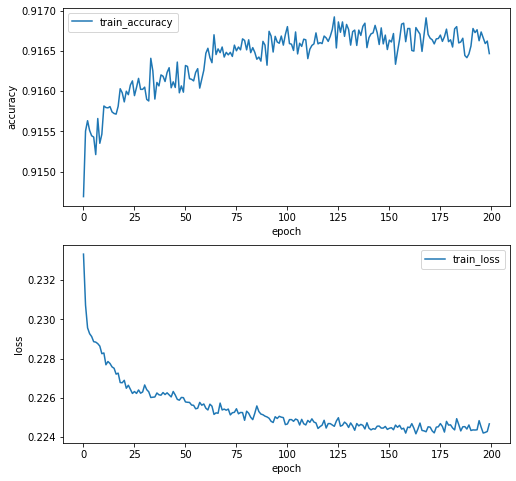

In [ ]:
def plot_results(model):

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()


    
plot_results(model)